In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 ' Linux'로 확인
    
    if system_name == 'Darwin':
        font_family = 'AppleGothic'
    elif system_name == 'Windows':
        font_family = 'Malgun Gothic'
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야 한다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨짐
        !apt-get update -qq
        !apt-get install fonts-nanum -qq > /dev/null
        
        import matplotlib.font_manager as fm
        
        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = 'NanumBarunGothic'
    return font_family

font_family = get_font_family()

# 그래프 스타일 설정
# 그래프 스타일을 밑에서 설정하면 폰트가 깨진다
plt.style.use('dark_background')
# 폰트설정
plt.rc('font', family=font_family)
# 마이너스 폰트 설정
plt.rc('axes', unicode_minus=False)


df = pd.read_csv('eft_2021-09-04.csv', dtype={'종목코드': object})
df.head()

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지H
0,069500,1,KODEX 200,41930,2,270,0.65,41979.0,-3.1976,2807005,117551,54593,국내 시장지수,KODEX,False,False,False
1,102110,1,TIGER 200,41960,2,270,0.65,42009.0,-3.1484,992124,41597,23225,국내 시장지수,TIGER,False,False,False
2,153130,6,KODEX 단기채권,102885,2,10,0.01,102883.0,0.0291,7598,781,20968,채권,KODEX,False,False,False
3,252670,3,KODEX 200선물인버스2X,2000,5,-25,-1.23,2004.0,5.2631,113442718,227795,20042,국내 파생,KODEX,True,False,False
4,371460,4,TIGER 차이나전기차SOLACTIVE,16480,5,-670,-3.91,NaN,26.3319,12395343,207101,18702,해외 주식,TIGER,False,False,False


In [3]:
desc = df.describe()
desc

,탭코드,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억)
count,502.000000,502.000000,502.000000,502.000000,502.000000,358.000000,476.000000,5.020000e+02,502.000000,502.000000
mean,3.252988,23607.081673,2.912351,68.984064,0.342331,26588.910615,0.745937,4.784020e+05,4440.587649,1281.025896
std,1.798686,25658.892514,1.338918,179.300492,0.780191,28289.401600,7.274499,5.408330e+06,29689.366440,3791.326563
min,1.000000,1990.000000,2.000000,-670.000000,-3.910000,1991.000000,-27.547500,0.000000e+00,0.000000,16.000000
25%,2.000000,10540.000000,2.000000,-10.000000,-0.047500,10614.500000,-3.208300,5.652500e+02,8.250000,87.000000
50%,2.000000,13572.500000,2.000000,42.500000,0.340000,14825.000000,-0.022750,5.464500e+03,88.000000,199.500000
75%,4.000000,21321.250000,5.000000,123.750000,0.717500,27739.500000,4.440175,3.686175e+04,581.000000,684.750000
max,7.000000,132595.000000,5.000000,2600.000000,4.360000,132534.000000,30.025900,1.134427e+08,454363.000000,54593.000000


In [4]:
num_cols = desc.columns.tolist()
num_cols

['탭코드',
 '현재가',
 '등락구분',
 '전일비',
 '등락률',
 '순자산가치(NAV)',
 '3개월수익률',
 '거래량',
 '거래대금(백만)',
 '시가총액(억)']

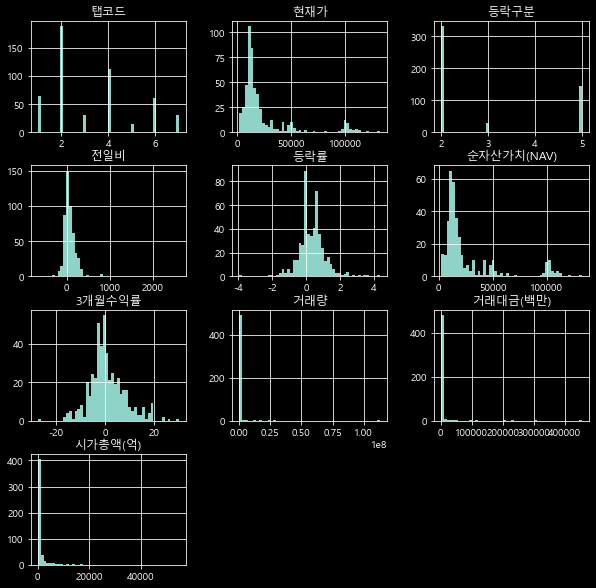

In [8]:
h = df[num_cols].hist(figsize=(10, 10), bins=50)

Text(0.5, 1.0, '브랜드별 평균 3개월 수익률')

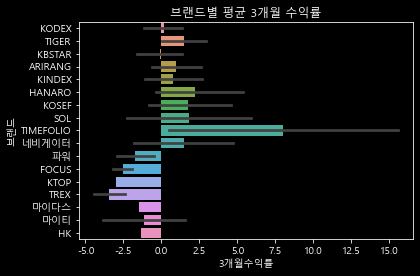

In [11]:
# 검은 막대는 ci 신뢰구간
sns.barplot(data=df, y='브랜드', x='3개월수익률').set_title('브랜드별 평균 3개월 수익률')

In [13]:
brand_3month_mean = df.groupby('브랜드')['3개월수익률'].mean()
brand_3month_mean

브랜드
ARIRANG      0.967108
FOCUS       -2.533650
HANARO       2.205667
HK          -1.357700
KBSTAR      -0.106989
KINDEX       0.740870
KODEX        0.161618
KOSEF        1.744617
KTOP        -3.015400
SOL          1.801820
TIGER        1.494080
TIMEFOLIO    8.039150
TREX        -3.435850
네비게이터        1.478600
마이다스        -1.504500
마이티         -1.152700
파워          -1.715525
Name: 3개월수익률, dtype: float64

<AxesSubplot:title={'center':'브랜드별 평균 3개월 수익률'}, ylabel='브랜드'>

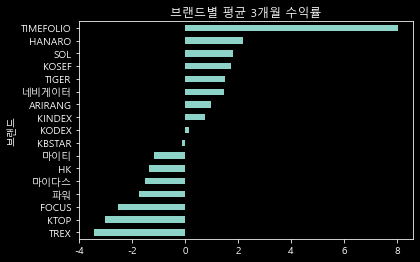

In [17]:
brand_3month_mean.sort_values().plot.barh(title='브랜드별 평균 3개월 수익률')

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

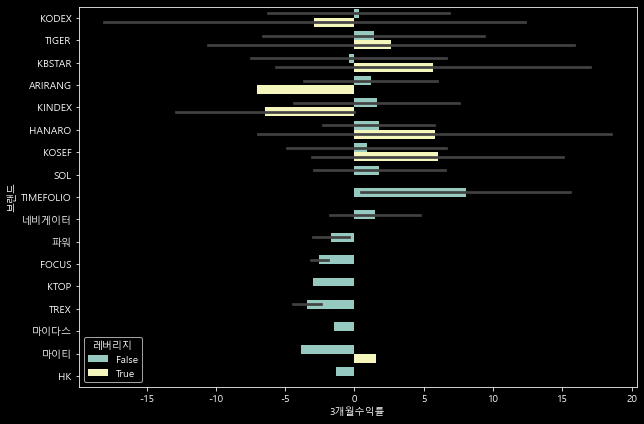

In [24]:
plt.figure(figsize=(10, 7))
sns.barplot(data=df, x='3개월수익률', y='브랜드', hue='레버리지', ci='sd')

In [33]:
g = df.groupby(['브랜드','레버리지'])['3개월수익률'].mean().to_frame()
g.style.background_gradient(cmap='Reds')

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

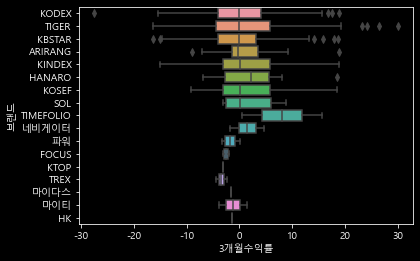

In [34]:
sns.boxplot(data=df, x='3개월수익률', y='브랜드')

In [36]:
kodex = df[df['브랜드'] == 'KODEX']
kodex

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지H
0,069500,1,KODEX 200,41930,2,270,0.65,41979.0,-3.1976,2807005,117551,54593,국내 시장지수,KODEX,False,False,False
2,153130,6,KODEX 단기채권,102885,2,10,0.01,102883.0,0.0291,7598,781,20968,채권,KODEX,False,False,False
3,252670,3,KODEX 200선물인버스2X,2000,5,-25,-1.23,2004.0,5.2631,113442718,227795,20042,국내 파생,KODEX,True,False,False
5,102780,2,KODEX 삼성그룹,10455,2,75,0.72,10472.0,3.7717,153755,1603,17334,국내 업종/테마,KODEX,False,False,False
6,122630,3,KODEX 레버리지,26700,2,335,1.27,26817.0,-6.7901,17057498,454363,17088,국내 파생,KODEX,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,321410,7,KODEX 멀티에셋하이인컴(H),11070,5,-5,-0.05,NaN,2.9767,401,4,55,기타,KODEX,False,False,True
463,261270,7,KODEX 미국달러선물인버스,9900,2,35,0.35,9893.0,-3.6965,2688,26,52,기타,KODEX,True,False,False
466,292770,6,KODEX 국채선물3년인버스,49695,3,0,0.00,49751.0,-0.0804,0,0,51,채권,KODEX,True,False,False
478,280940,4,KODEX 골드선물인버스(H),7200,2,10,0.14,NaN,4.5751,737,5,43,해외 주식,KODEX,True,False,True


<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

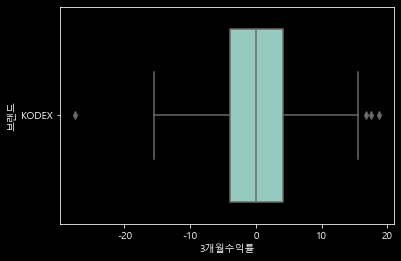

In [37]:
sns.boxplot(data=kodex, x='3개월수익률', y='브랜드')

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

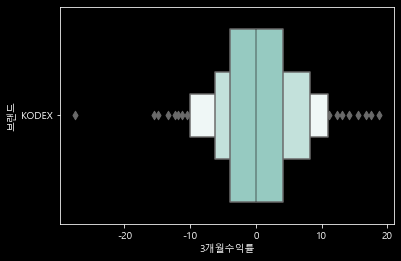

In [38]:
# 좀 더 자세한 boxplot
sns.boxenplot(data=kodex, x='3개월수익률', y='브랜드') 

<AxesSubplot:xlabel='3개월수익률', ylabel='Density'>

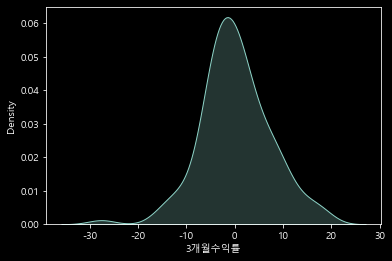

In [40]:
# 밀도
sns.kdeplot(data=kodex, x='3개월수익률', shade=True)

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

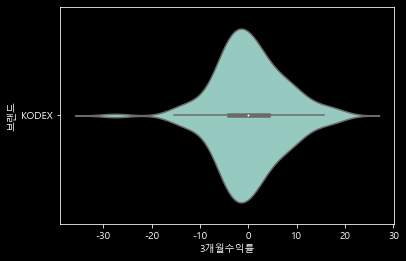

In [44]:
# 가운데 검은색: 박스플롯
# 가운데 하얀점: 중앙값
sns.violinplot(data=kodex, x='3개월수익률', y='브랜드', cut=3)

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

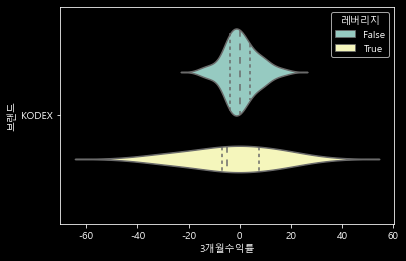

In [46]:
sns.violinplot(data=kodex, x='3개월수익률', y='브랜드', cut=3, inner='quartile', hue='레버리지')

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

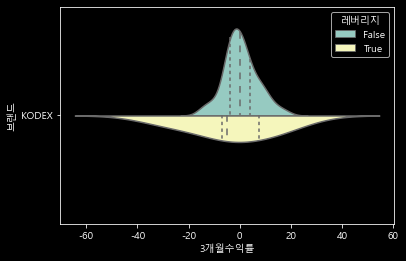

In [47]:
# split: 반씩 나눠그림
sns.violinplot(data=kodex, x='3개월수익률', y='브랜드', cut=3,
               inner='quartile', hue='레버리지', split=True)

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

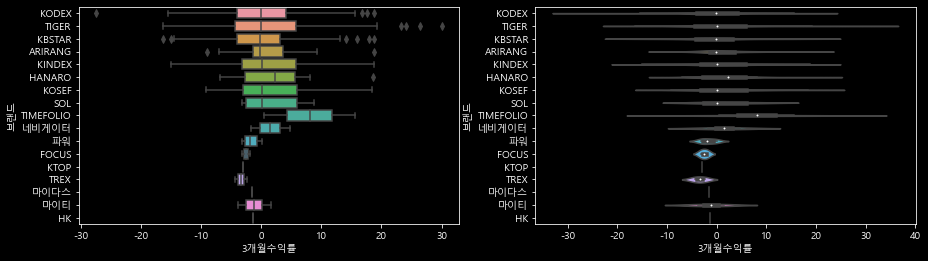

In [50]:
fig, axes = plt.subplots(ncols=2, figsize=(15,4))
sns.boxplot(data=df, x='3개월수익률', y='브랜드', ax=axes[0])
sns.violinplot(data=df, x='3개월수익률', y='브랜드', ax=axes[1])